In [59]:
%matplotlib qt
import mne
import os
import numpy as np

In [60]:
eeg_dat = mne.io.read_raw_edf('./a_1.edf', preload=True)

Extracting edf Parameters from ./a_1.edf...
Setting channel info structure...
Interpolating stim channel. Events may jitter.
Creating Raw.info structure...
Reading 0 ... 309499  =      0.000 ...  1237.996 secs...
Ready.


<ipython-input-60-6b66217ed81d>:1: RuntimeWarning: Interpolating stim channel. Events may jitter.
  eeg_dat = mne.io.read_raw_edf('./a_1.edf', preload=True)


In [61]:
eeg_dat.ch_names

[u'EEG FP1-REF',
 u'EEG FP2-REF',
 u'EEG F3-REF',
 u'EEG F4-REF',
 u'EEG C3-REF',
 u'EEG C4-REF',
 u'EEG P3-REF',
 u'EEG P4-REF',
 u'EEG O1-REF',
 u'EEG O2-REF',
 u'EEG F7-REF',
 u'EEG F8-REF',
 u'EEG T3-REF',
 u'EEG T4-REF',
 u'EEG T5-REF',
 u'EEG T6-REF',
 u'EEG A1-REF',
 u'EEG A2-REF',
 u'EEG FZ-REF',
 u'EEG CZ-REF',
 u'EEG PZ-REF',
 u'EEG ROC-REF',
 u'EEG LOC-REF',
 u'EEG EKG1-REF',
 u'EMG-REF',
 u'EEG 26-REF',
 u'EEG 27-REF',
 u'EEG 28-REF',
 u'EEG 29-REF',
 u'EEG 30-REF',
 u'EEG T1-REF',
 u'EEG T2-REF',
 u'PHOTIC-REF',
 u'IBI',
 u'BURSTS',
 'STI 014']

In [62]:
from collections import defaultdict
ch_types = defaultdict(str)
channel_names = []
channel_types = []

for ch in eeg_dat.ch_names:
    if 'EEG' in ch:
        ch_types[ch] = 'eeg'
    elif 'EMG' in ch:
        ch_types[ch] = 'emg'
    elif 'STI' in ch: 
        ch_types[ch] = 'stim'
    else:
        ch_types[ch] = 'misc'
        
eeg_dat.set_channel_types(ch_types)


# Example of one way to start fixing up the channels
#  Priority again is to keep everything consistent with MNE, so first check for MNE functions that can do 
#   things like this, and that can update this information insode the data.info object. 

from collections import defaultdict
ch_types = defaultdict(str)

channel_names = []
channel_types =[]

# lists to store the array names

for ch in eeg_dat.ch_names:    
    if 'EEG' in ch:
        ch_types[ch] = 'eeg'
        
    elif 'EMG' in ch:
        ch_types[ch] = 'emg'
        # Keeps track that this is an EMG channels
        
    elif 'STI' in ch:
        ch_types[ch] = 'stim'
        # Keeps track that this is an STI channel
    
    else:
        ch_types[ch] = 'misc'
        # Keeps track of MISC channels
        
eeg_dat.set_channel_types(ch_types)
        
for ch in eeg_dat.ch_names:    
    if 'EEG' in ch:
        ch = ch[4:7]
        ch =''.join(e for e in ch if e.isalnum())
        channel_names.append(ch)
        channel_types.append('eeg')
        ch_types[ch] = 'eeg'
        
    elif 'EMG' in ch:
        ch = ch[4:7]
        ch =''.join(e for e in ch if e.isalnum())
        channel_names.append(ch)
        channel_types.append('emg')
        ch_types[ch] = 'emg'
        # Keeps track that this is an EMG channels
        
    elif 'STI' in ch:
        channel_names.append(ch)
        channel_types.append('stim')
        ch_types[ch] = 'stim'
        # Keeps track that this is an STI channel
    
    else:
        channel_names.append(ch)
        channel_types.append('misc')
        ch_types[ch] = 'misc'
        # Keeps track of MISC channels
        
# The EEG channels use the standard naming strategy.
# By supplying the 'montage' parameter, approximate locations
montage = 'standard_1020'

info = mne.create_info(channel_names, eeg_dat.info['sfreq'], channel_types, montage)
print(info)

The following EEG sensors did not have a position specified in the selected montage: [u'ROC', u'LOC', u'EKG', u'26', u'27', u'28', u'29', u'30', u'T1', u'T2']. Their position has been left untouched.
<Info | 15 non-empty fields
    bads : list | 0 items
    ch_names : list | FP1, FP2, F3, F4, C3, C4, P3, P4, O1, ...
    chs : list | 36 items (EEG: 31, STIM: 1, MISC: 3, EMG: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : 'mne.transforms.Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 125.0 Hz
    meas_date : numpy.ndarray | 1969-12-31 19:00:00
    nchan : int | 36
    projs : list | 0 items
    sfreq : float | 250.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    buffer_size_sec : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : Non

<ipython-input-62-1d9a003652fe>:81: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: [u'ROC', u'LOC', u'EKG', u'26', u'27', u'28', u'29', u'30', u'T1', u'T2']. Their position has been left untouched.
  info = mne.create_info(channel_names, eeg_dat.info['sfreq'], channel_types, montage)


In [63]:
eeg_dat.info

<Info | 16 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-REF, ...
    chs : list | 36 items (EEG: 31, STIM: 1, MISC: 3, EMG: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : 'mne.transforms.Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 125.0 Hz
    meas_date : int | 1320742207
    nchan : int | 36
    projs : list | 0 items
    sfreq : float | 250.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_lay

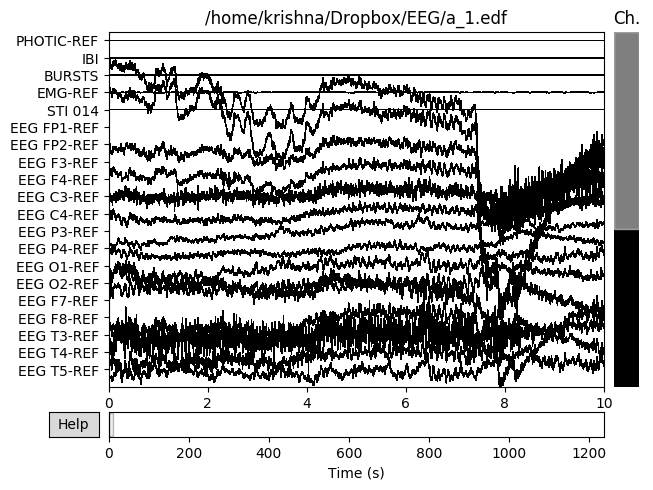

In [64]:
eeg_dat.plot()

tmax defaults to 60. in 0.14 but will change to np.inf in 0.15. Set it explicitly to avoid this warning
Effective window size : 8.192 (s)


<ipython-input-65-650886116877>:1: DeprecationWarning: tmax defaults to 60. in 0.14 but will change to np.inf in 0.15. Set it explicitly to avoid this warning
  eeg_dat.plot_psd()
/usr/local/lib/python2.7/dist-packages/mne/viz/raw.py:614: DeprecationWarning: In version 0.15 average will default to False and spatial_colors will default to True.
  'spatial_colors will default to True.', DeprecationWarning)


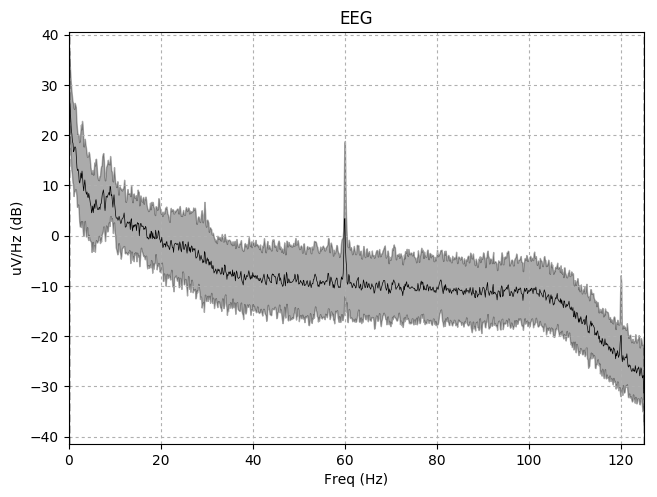

In [65]:
eeg_dat.plot_psd()

In [58]:
notches = np.arange(60, 61, 60)
eeg_dat.notch_filter(notches)
eeg_dat.filter(1, 70, h_trans_bandwidth=10)
eeg_dat.plot_psd()

mne.time_frequency.morlet(256, [40], n_cycles = 7)

events = mne.find_events(eeg_dat, shortest_event=0, stim_channel = 'STI 014')
picks = mne.pick_types(eeg_dat.info, meg = False, eeg=True, stim=False, eog=False, exclude='bads')

epochs = mne.Epochs(eeg_dat, events, event_id, tmin, tmax, proj=True, picks=picks, baseline=None, preload=True)

Setting up band-stop filter from 59 - 61 Hz
Filter length of 3300 samples (13.200 sec) selected
Setting up band-pass filter from 1 - 70 Hz
l_trans_bandwidth chosen to be 1.0 Hz
Filter length of 1650 samples (6.600 sec) selected
tmax defaults to 60. in 0.14 but will change to np.inf in 0.15. Set it explicitly to avoid this warning
Effective window size : 8.192 (s)


<ipython-input-58-a998c4581135>:4: DeprecationWarning: tmax defaults to 60. in 0.14 but will change to np.inf in 0.15. Set it explicitly to avoid this warning
  eeg_dat.plot_psd()
/usr/local/lib/python2.7/dist-packages/mne/viz/raw.py:614: DeprecationWarning: In version 0.15 average will default to False and spatial_colors will default to True.
  'spatial_colors will default to True.', DeprecationWarning)


NameError: name 'event_id' is not defined

Setting up band-stop filter from 59 - 61 Hz
Filter length of 3300 samples (13.200 sec) selected
Setting up band-pass filter from 1 - 70 Hz
l_trans_bandwidth chosen to be 1.0 Hz
Filter length of 1650 samples (6.600 sec) selected
tmax defaults to 60. in 0.14 but will change to np.inf in 0.15. Set it explicitly to avoid this warning
Effective window size : 8.192 (s)


<ipython-input-10-b4102348b71d>:4: DeprecationWarning: tmax defaults to 60. in 0.14 but will change to np.inf in 0.15. Set it explicitly to avoid this warning
  filtered.plot_psd()
/usr/local/lib/python2.7/dist-packages/mne/viz/raw.py:614: DeprecationWarning: In version 0.15 average will default to False and spatial_colors will default to True.
  'spatial_colors will default to True.', DeprecationWarning)


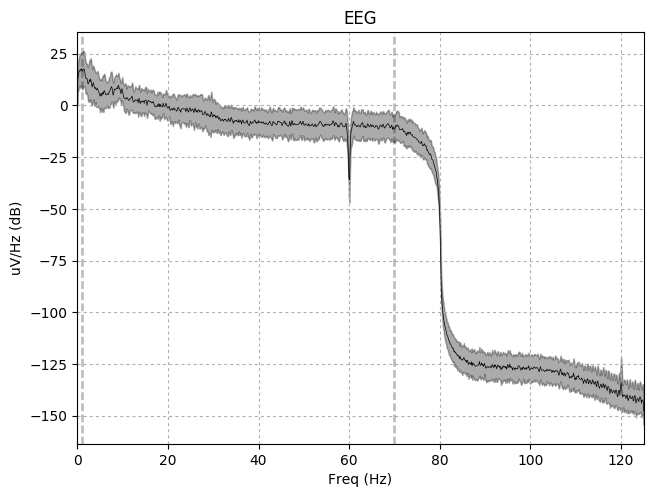

In [10]:
notches = np.arange(60, 61, 60)
eeg_dat.notch_filter(notches)
filtered = eeg_dat.copy().filter(1, 70, h_trans_bandwidth=10)
filtered.plot_psd()

In [11]:
filtered.info

<Info | 16 non-empty fields
    bads : list | 0 items
    buffer_size_sec : float | 1.0
    ch_names : list | EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-REF, ...
    chs : list | 31 items (EEG: 31)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : 'mne.transforms.Transform | 3 items
    events : list | 0 items
    highpass : float | 1.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 70.0 Hz
    meas_date : int | 1320742207
    nchan : int | 31
    projs : list | 0 items
    sfreq : float | 250.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subject_info : NoneType
    xplotter_layout : NoneType
>

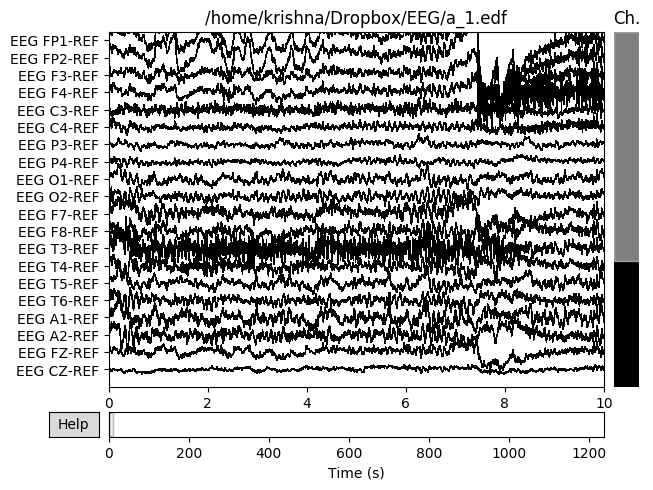

In [12]:
filtered.plot()

In [37]:
filtered

<RawEDF  |  a_1.edf, n_channels x n_times : 31 x 309500 (1238.0 sec), ~73.3 MB, data loaded>

In [35]:
ch_names = filtered.info['ch_names']
picks = filtered.pick_channels(ch_names=ch_names)

IndexError: index 0 is out of bounds for axis 1 with size 0

[]
